In [1]:
import os
import sys
import dask
import zarr
import xesmf as xe
import numpy as np
import xarray as xr
from glob import glob
# import wrf

In [2]:
sys.path.insert(0, os.path.realpath('../libs/'))
import plevel_utils as pu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Variable info

In [4]:
ERA5_dir = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/all_in_one/ERA5_GP_{}.zarr'

In [5]:
domain_inds = np.arange(336).astype(np.float32)

In [6]:
static_WRF_name = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/static/C404_GP_static.zarr'
ds_WRF_static = xr.open_zarr(static_WRF_name)
XLAT = ds_WRF_static['XLAT'].values
XLONG = ds_WRF_static['XLONG'].values
ds_WRF_static = ds_WRF_static.assign_coords(lat=(("south_north", "west_east"), XLAT))
ds_WRF_static = ds_WRF_static.assign_coords(lon=(("south_north", "west_east"), XLONG))

In [7]:
for year in range(1980, 2023):
    print(f'Interpolating year {year}')
    
    ds_ERA5 = xr.open_zarr(ERA5_dir.format(year))
    ds_ERA5['longitude'] = (ds_ERA5['longitude']  + 180) % 360 - 180
    ds_ERA5 = ds_ERA5.rename({'longitude': 'lon', 'latitude': 'lat'})
    regridder = xe.Regridder(ds_ERA5, ds_WRF_static, method='bilinear')
    ds_ERA5_interp = regridder(ds_ERA5)
    
    ds_ERA5_interp = ds_ERA5_interp.assign_coords(
        south_north=domain_inds, 
        west_east=domain_inds
    )
    
    ds_ERA5_interp = ds_ERA5_interp.drop_vars(['lon', 'lat'])
    
    save_name = f'/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_{year}.zarr'
    print(save_name)
    ds_ERA5_interp.to_zarr(save_name, mode='w', consolidated=True, compute=True)

Interpolating year 1980
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1980.zarr
Interpolating year 1981
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1981.zarr
Interpolating year 1982
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1982.zarr
Interpolating year 1983
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1983.zarr
Interpolating year 1984
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1984.zarr
Interpolating year 1985
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1985.zarr
Interpolating year 1986
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1986.zarr
Interpolating year 1987
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1987.zarr
Interpolating year 1988
/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_1988.zarr
Interpolating year 

## Interpolated ERA5 vs CONUS 404

In [ ]:
year = 1980

save_name = f'/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale/ERA5_dscale_GP_{year}.zarr'
ds_test = xr.open_zarr(save_name)
T = ds_test['T'].isel(time=999).values

In [8]:
ds_WRF = xr.open_zarr(f'/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/all_in_one/C404_GP_{year}.zarr')
T_WRF = ds_WRF['WRF_T'].isel(time=999*6).values

/glade/derecho/scratch/ksha/tmp/ipykernel_68951/3952204875.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(XLONG, XLAT, T[0, ...], vmin=T[0, ...].min(), vmax=T[0, ...].max(), cmap=plt.cm.jet)


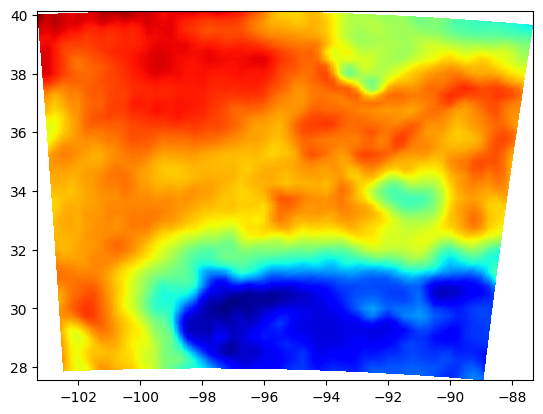

In [18]:
plt.pcolormesh(XLONG, XLAT, T[0, ...], vmin=T[0, ...].min(), vmax=T[0, ...].max(), cmap=plt.cm.jet)

/glade/derecho/scratch/ksha/tmp/ipykernel_68951/2632499600.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(XLONG, XLAT, T_WRF[0, ...], vmin=T[0, ...].min(), vmax=T[0, ...].max(), cmap=plt.cm.jet)


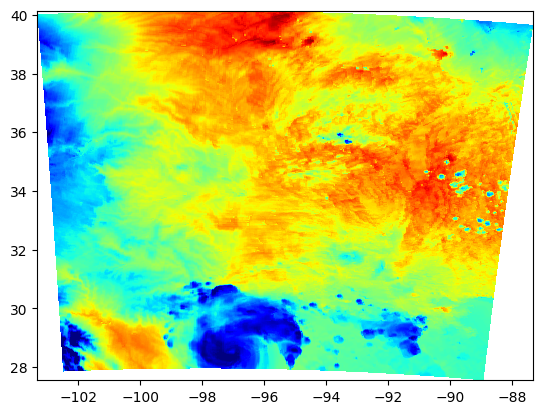

In [19]:
plt.pcolormesh(XLONG, XLAT, T_WRF[0, ...], vmin=T[0, ...].min(), vmax=T[0, ...].max(), cmap=plt.cm.jet)